In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

In [2]:
%matplotlib inline

In [3]:
nflx = yf.download('NFLX', 
                  '2012-09-29', 
                  '2022-10-01', 
                  auto_adjust = True, 
                  progress = False)

In [4]:
nflx = nflx['Close']

In [5]:
nflx

Date
2012-09-28      7.777143
2012-10-01      8.007143
2012-10-02      8.065714
2012-10-03      8.940000
2012-10-04      9.524286
                 ...    
2022-09-26    224.070007
2022-09-27    224.360001
2022-09-28    245.199997
2022-09-29    239.710007
2022-09-30    235.440002
Name: Close, Length: 2518, dtype: float64

In [6]:
(nflx.index[nflx.index.year == 2012])[nflx.index[nflx.index.year == 2012].month == 12][-1]

Timestamp('2012-12-31 00:00:00')

In [7]:
date = pd.Series(0, index = np.arange(121))

date

0      0
1      0
2      0
3      0
4      0
      ..
116    0
117    0
118    0
119    0
120    0
Length: 121, dtype: int64

In [8]:
for i in np.arange(4):
    date[i] = (nflx.index[nflx.index.year == 2012])[nflx.index[nflx.index.year == 2012].month == (i+9)][-1]

for i in np.arange(4, 4+12):
    date[i] = (nflx.index[nflx.index.year == 2013])[nflx.index[nflx.index.year == 2013].month == (i-3)][-1]

for i in np.arange(16, 16+12):
    date[i] = (nflx.index[nflx.index.year == 2014])[nflx.index[nflx.index.year == 2014].month == (i-15)][-1]

for i in np.arange(28, 28+12):
    date[i] = (nflx.index[nflx.index.year == 2015])[nflx.index[nflx.index.year == 2015].month == (i-27)][-1]

for i in np.arange(40, 40+12):
    date[i] = (nflx.index[nflx.index.year == 2016])[nflx.index[nflx.index.year == 2016].month == (i-39)][-1]

for i in np.arange(52, 52+12):
    date[i] = (nflx.index[nflx.index.year == 2017])[nflx.index[nflx.index.year == 2017].month == (i-51)][-1]

for i in np.arange(64, 64+12):
    date[i] = (nflx.index[nflx.index.year == 2018])[nflx.index[nflx.index.year == 2018].month == (i-63)][-1]

for i in np.arange(76, 76+12):
    date[i] = (nflx.index[nflx.index.year == 2019])[nflx.index[nflx.index.year == 2019].month == (i-75)][-1]

for i in np.arange(88, 88+12):
    date[i] = (nflx.index[nflx.index.year == 2020])[nflx.index[nflx.index.year == 2020].month == (i-87)][-1]

for i in np.arange(100, 100+12):
    date[i] = (nflx.index[nflx.index.year == 2021])[nflx.index[nflx.index.year == 2021].month == (i-99)][-1]

for i in np.arange(112, 121):
    date[i] = (nflx.index[nflx.index.year == 2022])[nflx.index[nflx.index.year == 2022].month == (i-111)][-1]

In [9]:
pd.to_datetime(date)

0     2012-09-28
1     2012-10-31
2     2012-11-30
3     2012-12-31
4     2013-01-31
         ...    
116   2022-05-31
117   2022-06-30
118   2022-07-29
119   2022-08-31
120   2022-09-30
Length: 121, dtype: datetime64[ns]

In [10]:
pd.date_range(start="2012-09-29",end="2022-09-30",freq = 'M')

DatetimeIndex(['2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', length=121, freq='M')

In [11]:
main = pd.DataFrame(0, 
                  index = pd.to_datetime(date), 
                  columns = ['ARIMA Forecast Return', 
                            'Shares Owned', 
                            'Shares Bought/Sold', 
                             'Share Price', 
                            'Holding Value', 
                            'sales & purchase $ value', 
                            'Net Cash', 
                            'Portfolio Total', 
                            'Portfolio Returns']
                  )

In [12]:
main

,ARIMA Forecast Return,Shares Owned,Shares Bought/Sold,Share Price,Holding Value,sales & purchase $ value,Net Cash,Portfolio Total,Portfolio Returns
2012-09-28,0,0,0,0,0,0,0,0,0
2012-10-31,0,0,0,0,0,0,0,0,0
2012-11-30,0,0,0,0,0,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0
2013-01-31,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-05-31,0,0,0,0,0,0,0,0,0
2022-06-30,0,0,0,0,0,0,0,0,0
2022-07-29,0,0,0,0,0,0,0,0,0
2022-08-31,0,0,0,0,0,0,0,0,0


## Note:

> Holding value = shares owned * share price

> sales & purchase $ value = Shares bought / sold * share price

> net cash = initial capital - sales & purchase $ value

> Portfolio total = Holding value + net cash

> realized return is based on portfolio total

In [13]:
pd.to_datetime(date)

0     2012-09-28
1     2012-10-31
2     2012-11-30
3     2012-12-31
4     2013-01-31
         ...    
116   2022-05-31
117   2022-06-30
118   2022-07-29
119   2022-08-31
120   2022-09-30
Length: 121, dtype: datetime64[ns]

In [14]:
# nflx_monthend = pd.DataFrame(0, 
#                              index = pd.date_range(start="2012-09-29",end="2022-09-30",freq = 'M').strftime('%Y-%m'), 
#                              columns = ['NFLX'])

# nflx_monthend

# for date in pd.date_range(start="2012-09-29",end="2022-09-30",freq = 'M').strftime('%Y-%m'):
#     nflx_monthend.loc[date] = nflx[nflx.index.strftime('%Y-%m')==date][-1]

# nflx_monthend

nflx_monthend = pd.DataFrame(0, 
                             index = pd.to_datetime(date), 
                             columns = ['NFLX'])

nflx_monthend

for date in pd.to_datetime(date):
    nflx_monthend.loc[date] = nflx[nflx.index==date][-1]

In [15]:
main['Share Price'] = nflx_monthend

In [16]:
main

,ARIMA Forecast Return,Shares Owned,Shares Bought/Sold,Share Price,Holding Value,sales & purchase $ value,Net Cash,Portfolio Total,Portfolio Returns
2012-09-28,0,0,0,7.777143,0,0,0,0,0
2012-10-31,0,0,0,11.320000,0,0,0,0,0
2012-11-30,0,0,0,11.672857,0,0,0,0,0
2012-12-31,0,0,0,13.227143,0,0,0,0,0
2013-01-31,0,0,0,23.605715,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-05-31,0,0,0,197.440002,0,0,0,0,0
2022-06-30,0,0,0,174.869995,0,0,0,0,0
2022-07-29,0,0,0,224.899994,0,0,0,0,0
2022-08-31,0,0,0,223.559998,0,0,0,0,0


In [17]:
fitted = pd.read_csv('nflxfitted.csv')
fitted

,Unnamed: 0,x
0,1,22.586268
1,2,22.837679
2,3,24.940249
3,4,27.358160
4,5,31.286091
...,...,...
116,117,419.589909
117,118,425.465820
118,119,475.099679
119,120,486.236345


In [18]:
test = pd.read_csv('nflxtest.csv')
test

,Unnamed: 0,x
0,1,495.328400
1,2,503.611438
2,3,487.580031
3,4,489.870765
4,5,487.078528
5,6,476.271629
6,7,474.651374
7,8,480.454953
8,9,479.970893
9,10,468.415072


In [19]:
a = pd.concat([fitted, test], 
         axis = 0) \
                .reset_index()

In [20]:
arima_fit = a.iloc[24:]

In [21]:
arima_fit.drop(['index', 
                  'Unnamed: 0'], 
                  axis = 1, 
                 inplace = True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19136\184881167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_fit.drop(['index',


In [22]:
arima_fit.reset_index(drop = True, inplace = True)

In [23]:
pd.DataFrame(main.index)[0]

0     2012-09-28
1     2012-10-31
2     2012-11-30
3     2012-12-31
4     2013-01-31
         ...    
116   2022-05-31
117   2022-06-30
118   2022-07-29
119   2022-08-31
120   2022-09-30
Name: 0, Length: 121, dtype: datetime64[ns]

In [24]:
arima = pd.concat([arima_fit, pd.DataFrame(main.index)[0]], axis = 1)

In [25]:
arima_fitted = arima.rename(columns = {0: "Date", "x":"ARIMA Forecast Price"})

In [26]:
arima_fitted

,ARIMA Forecast Price,Date
0,2.937344,2012-09-28
1,8.118191,2012-10-31
2,12.534491,2012-11-30
3,12.063977,2012-12-31
4,22.145684,2013-01-31
...,...,...
116,401.973855,2022-05-31
117,401.989933,2022-06-30
118,381.783429,2022-07-29
119,371.882901,2022-08-31


In [27]:
arima_fitted.set_index('Date', inplace = True)

In [28]:
arima_fitted

,ARIMA Forecast Price
Date,
2012-09-28,2.937344
2012-10-31,8.118191
2012-11-30,12.534491
2012-12-31,12.063977
2013-01-31,22.145684
...,...
2022-05-31,401.973855
2022-06-30,401.989933
2022-07-29,381.783429


In [29]:
arima_fitted['NFLX Actual Price'] = nflx_monthend['NFLX']

In [30]:
arima_fitted

,ARIMA Forecast Price,NFLX Actual Price
Date,,
2012-09-28,2.937344,7.777143
2012-10-31,8.118191,11.320000
2012-11-30,12.534491,11.672857
2012-12-31,12.063977,13.227143
2013-01-31,22.145684,23.605715
...,...,...
2022-05-31,401.973855,197.440002
2022-06-30,401.989933,174.869995
2022-07-29,381.783429,224.899994


## Visualize the forecast price against actual price

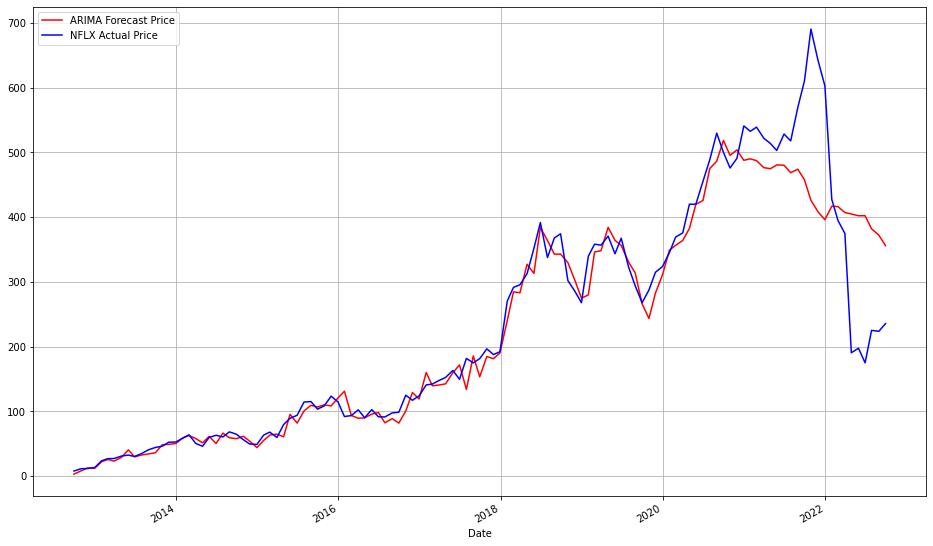

In [31]:
ax = arima_fitted[['ARIMA Forecast Price', 
                  'NFLX Actual Price']
                     ].plot(figsize = (16, 10), 
                           style = ['r-', 
                                   'b-'])
plt.grid()

In [32]:
main['ARIMA Forecast Return'] = (arima_fitted['ARIMA Forecast Price'] / arima_fitted['ARIMA Forecast Price'].shift(1)
                                                        ) - 1

In [33]:
main

,ARIMA Forecast Return,Shares Owned,Shares Bought/Sold,Share Price,Holding Value,sales & purchase $ value,Net Cash,Portfolio Total,Portfolio Returns
2012-09-28,NaN,0,0,7.777143,0,0,0,0,0
2012-10-31,1.763786,0,0,11.320000,0,0,0,0,0
2012-11-30,0.544000,0,0,11.672857,0,0,0,0,0
2012-12-31,-0.037538,0,0,13.227143,0,0,0,0,0
2013-01-31,0.835687,0,0,23.605715,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.006662,0,0,197.440002,0,0,0,0,0
2022-06-30,0.000040,0,0,174.869995,0,0,0,0,0
2022-07-29,-0.050266,0,0,224.899994,0,0,0,0,0
2022-08-31,-0.025932,0,0,223.559998,0,0,0,0,0


In [34]:
main['ARIMA Forecast Return'].describe()

count    120.000000
mean       0.057975
std        0.226261
min       -0.286384
25%       -0.043601
50%        0.009147
75%        0.101327
max        1.763786
Name: ARIMA Forecast Return, dtype: float64

In [35]:
nflx_adtv = pd.read_excel('NFLX adtv.xlsx')

adtv = nflx_adtv.sort_values(by = 'Dates', ascending = True).set_index('Dates')

In [36]:
adtv

,monthly ADTV,Rf
Dates,,
2012-09-30,3.061075e+08,NaN
2012-10-31,3.595777e+08,0.000076
2012-11-30,3.345901e+08,0.000093
2012-12-31,3.407281e+08,0.000017
2013-01-31,4.947916e+08,0.000034
...,...,...
2022-05-31,3.505776e+09,0.000615
2022-06-30,2.579581e+09,0.000911
2022-07-31,2.726172e+09,NaN


## Building trading strategy

> function with arima forecast return as input, which updates shares owned

In [37]:
# def trading_pos(x):
#     if x > 0.1:
#         return 210500
#     elif 0.07 < x <= 0.1:
#         return 95000
#     elif   0.01 < x <= 0.07:
#         return 8000
#     else:
#         return 0
    

# def trading_pos(x):
#     if x > 1:
#         return 4000000
#     elif 0.1 < x <= 1:
#         return 170000
#     elif 0.07 < x <= 0.1:
#         return 95000
#     elif   0.01 < x <= 0.07:
#         return 8000
#     else:
#         return 0
# this gives 30% cash position and 11% CAGR

def trading_pos(x):
    if x > 1:
        return 300000
    elif 0.5 < x <= 1:
        return 250000
    
    elif 0.1 < x < 0.5:
        return 100000
    elif 0.01 < x <= 0.1:
        return 80000
#     elif   0.005 < x <= 0.01:
#         return 2000
    else:
        return 0

In [38]:
capital = 25000000 
netcashpct = 0.30


main["Shares Owned"] = main["ARIMA Forecast Return"].apply(trading_pos)

main["Shares Bought/Sold"] = main["Shares Owned"].diff()

main["fee"] = abs(main["Shares Bought/Sold"]*main["Share Price"].shift(1)*0.004)

main["Holding Value"] = main["Share Price"] * main['Shares Owned']

main['sales & purchase $ value'] = -(main['Share Price'].shift(1) * main['Shares Bought/Sold'])

main['Net Cash'] = capital + main['sales & purchase $ value'].cumsum()

main['Portfolio Total'] = main['Holding Value'] + main['Net Cash'] - main["fee"].cumsum()

main['Portfolio Total'][0] = capital

main['Portfolio Returns'] = np.log(main['Portfolio Total'] / main['Portfolio Total'].shift(1)
                                    )

main['Cumulative Portfolio Returns'] = main['Portfolio Returns'].cumsum().apply(np.exp)

main['Net Cash'].mean()

(main['Cumulative Portfolio Returns'].iloc[-1])*capital

main["Shares Owned"].value_counts()

main['ADTV'] = adtv['monthly ADTV']

main['Rf'] = adtv['Rf'] 

main['Rf'].ffill(inplace = True)


main['Rf Adjusted Portfolio Returns'] = ((main['Portfolio Total'] / main['Portfolio Total'].shift(1)
                                           ) - 1) - main['Rf']

sharpe = np.sqrt(12) * (main['Portfolio Returns'].mean() / main['Portfolio Returns'].std()
              )

sharpe_rf_adjusted = np.sqrt(12) * (main['Rf Adjusted Portfolio Returns'].mean() / \
                                    main['Rf Adjusted Portfolio Returns'].std()
                                    )


CAGR = ((main['Portfolio Total'][-1] / capital) ** (12/120)) - 1

count = 0

for i in np.arange(2, len(main.index)):
    if main['Net Cash'].iloc[i] < main['Net Cash'].iloc[i-1] * netcashpct:
        count += 1
        
lowest_pct = (main['Net Cash'] / main['Net Cash'].shift(1)
        ).min() * 100

adtv_count = 0

for i in np.arange(1, len(main.index)):
    if (abs(main['Shares Bought/Sold'][i]) / main['ADTV'][i] * 100) > 20:
        adtv_count += 1
        
trading_vol_pct_adtv = (abs(main['Shares Bought/Sold']) / main['ADTV'] * 100).max()


main["checker"] = str
for i in range(0, len(main["Net Cash"])):
    if main["sales & purchase $ value"][i] < 0 and abs(main["sales & purchase $ value"][i]) > (1-netcashpct)*main["Net Cash"][i-1]:
        main["checker"][i] = "T"
    else:
        main["checker"][i] = "F"

#print("Net cash position fell below " + str(netcashpct) +" for " + str(count) + " times.")
#print("Lowest net cash position relative to the net cash on previous month is " + str("%.2f"%lowest_pct) + "%")
print('Dollar value of trades exceeds 20% of ADTV for ' + str(adtv_count) + ' times.')
print('Highest executed dollar value of trades to ADTV percentage is ' + str("%.3f"%trading_vol_pct_adtv) + '%.')
print("----------------------------------------------------------------------------")
print("CAGR is " + str("%.2f"%(CAGR * 100)) + "%")
print('Sharpe ratio without Rf is ' + str("%.4f"%sharpe) + ', Sharpe ratio with Rf is ' + str("%.4f"%sharpe_rf_adjusted))

Dollar value of trades exceeds 20% of ADTV for 0 times.
Highest executed dollar value of trades to ADTV percentage is 0.083%.
----------------------------------------------------------------------------
CAGR is 11.00%
Sharpe ratio without Rf is 0.9164, Sharpe ratio with Rf is 0.9131


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19136\3759475576.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Portfolio Total'][0] = capital
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19136\3759475576.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main["checker"][i] = "F"


In [39]:

#shares owned is what you have as of month end... 
# on the last day of every month you run your arima model and obtain the arima forecasted returns;
#..for the following month and that will tell you how many shares you should as of the end of the following month and hence..
#have to either sell or buy more shares on the first day of every new month in order to obtain that next period month end shares balance
#shares bought/sold is the action you take at the start of the month and hence the different between the two month ends 
#fee is 0.04% of trade notional executed on the first day of every month
#holding value is month end shares balance * month end share price
#net cash is holding value of shares owned + cummulative realised P&L 
#portfolio returns is np.log(portfolio value 1/portfolio value 0)
#Rf Adjusted Portfolio Returns is (p1/po-1) - rf
#trade notional of buy and sells cannot exceed ADTV on that day

main

,ARIMA Forecast Return,Shares Owned,Shares Bought/Sold,Share Price,Holding Value,sales & purchase $ value,Net Cash,Portfolio Total,Portfolio Returns,fee,Cumulative Portfolio Returns,ADTV,Rf,Rf Adjusted Portfolio Returns,checker
2012-09-28,NaN,0,NaN,7.777143,0.000000e+00,NaN,NaN,2.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,F
2012-10-31,1.763786,300000,300000.0,11.320000,3.396000e+06,-2.333143e+06,2.266686e+07,2.605352e+07,0.041277,9332.571602,1.042141,3.595777e+08,0.000076,0.042065,F
2012-11-30,0.544000,250000,-50000.0,11.672857,2.918214e+06,5.660000e+05,2.323286e+07,2.613947e+07,0.003294,2263.999939,1.045579,3.345901e+08,0.000093,0.003206,F
2012-12-31,-0.037538,0,-250000.0,13.227143,0.000000e+00,2.918214e+06,2.615107e+07,2.612780e+07,-0.000447,11672.857285,1.045112,3.407281e+08,0.000017,-0.000463,F
2013-01-31,0.835687,250000,250000.0,23.605715,5.901429e+06,-3.306786e+06,2.284429e+07,2.870922e+07,0.094218,13227.143288,1.148369,4.947916e+08,0.000034,0.098765,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.006662,0,0.0,197.440002,0.000000e+00,-0.000000e+00,7.544100e+07,7.100289e+07,0.000000,0.000000,2.840116,3.505776e+09,0.000615,-0.000615,F
2022-06-30,0.000040,0,0.0,174.869995,0.000000e+00,-0.000000e+00,7.544100e+07,7.100289e+07,0.000000,0.000000,2.840116,2.579581e+09,0.000911,-0.000911,F
2022-07-29,-0.050266,0,0.0,224.899994,0.000000e+00,-0.000000e+00,7.544100e+07,7.100289e+07,0.000000,0.000000,2.840116,NaN,0.000911,-0.000911,F
2022-08-31,-0.025932,0,0.0,223.559998,0.000000e+00,-0.000000e+00,7.544100e+07,7.100289e+07,0.000000,0.000000,2.840116,2.156214e+09,0.001913,-0.001913,F


In [40]:
main["Net Cash"].min()

13750400.02822876

In [41]:
main["ARIMA Forecast Return"].describe()

count    120.000000
mean       0.057975
std        0.226261
min       -0.286384
25%       -0.043601
50%        0.009147
75%        0.101327
max        1.763786
Name: ARIMA Forecast Return, dtype: float64

In [42]:
main["checker"].value_counts()

F    121
Name: checker, dtype: int64

In [43]:
year_1 = main["Portfolio Returns"][1:13].sum()
year_1

0.20299675238824752

In [44]:
year_2 = main["Portfolio Returns"][13:25].sum()
year_2

0.06854603323012429

In [45]:
year_3 = main["Portfolio Returns"][25:37].sum()
year_3

0.1353326217375612

In [46]:
year_4 = main["Portfolio Returns"][37:49].sum()
year_4

-0.05334212633491903

In [47]:
year_5 = main["Portfolio Returns"][49:61].sum()
year_5

0.07392177510889342

In [48]:
year_6 = main["Portfolio Returns"][61:73].sum()
year_6

0.3599976222853918

In [49]:
year_7 = main["Portfolio Returns"][73:85].sum()
year_7

0.14318394454375682

In [50]:
year_8 = main["Portfolio Returns"][85:97].sum()
year_8 

0.25751157053817825

In [51]:
year_9 = main["Portfolio Returns"][97:109].sum()
year_9 

0.03981089044907464

In [52]:
year_10 = main["Portfolio Returns"][109:121].sum()
year_10

-0.18411431806192993

In [53]:
list_1 = [year_1, year_2, year_3, year_4, year_5, year_6, year_7, year_8, year_9, year_10]
list_1

[0.20299675238824752,
 0.06854603323012429,
 0.1353326217375612,
 -0.05334212633491903,
 0.07392177510889342,
 0.3599976222853918,
 0.14318394454375682,
 0.25751157053817825,
 0.03981089044907464,
 -0.18411431806192993]

In [54]:
np.std(main["Portfolio Returns"].apply(np.exp)-1)

0.03320611201484297

In [55]:
np.std(main["Portfolio Returns"])*np.sqrt(12)

0.11343006381953513